<font size=3> Chapter3 is mainly about the threotical background in MDPs, thus is skipped. Today we will work several examples in textbook on DP.

# Grid Word Example
<font size=4> see textbook page 77 for details.

In [1]:
from rlp.dynamic_programming.agents import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from rlp.grid_world import OFFSET

In [3]:
def run_dp_solver(rows, cols, terminals, gamma=0.99):
    """
    """
    solver = DPGridWorldSolver(rows, cols, terminals, gamma)
    stats = {}
    for k in range(1):
        solver.policy_eval()
        solver.policy_improve()
        values = solver.V
        policy = solver.policy
    
        stats[k] = (values, policy)
    
    return stats

stats = run_dp_solver(5, 5, [(0, 0), (4, 4)])

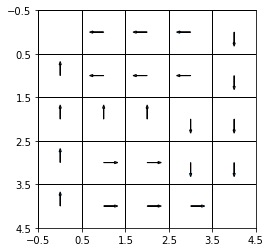

In [4]:
def draw_grid_world_value(rows, cols, state_values):
    """ draw value function in the grid world.
    Params:
    rows - number of rows
    cols - number of columns
    state_values - dict, value function of each entry in the grid world
    """
    pass

def draw_grid_world_policy(rows, cols, policy, mask_cell):
    """ draw value function in the grid world.
    Params:
    rows - number of rows
    cols - number of columns
    policy - dict, distribution of directions at each entry in the grid world
    """
    plt.subplot(aspect='equal')
    plt.gca().invert_yaxis()

    x = [-0.5 + i for i in range(rows + 1)]
    y = [-0.5 + i for i in range(cols + 1)]
    plt.xticks(x)
    plt.yticks(y)
    plt.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
    for cell in policy:
        if cell in mask_cell:
            continue
        y, x = cell
        for action, prob in enumerate(policy[cell]):
            if prob != 0:
                dy, dx = OFFSET[action]
                plt.arrow(x, y, 0.25 * dx, 0.25 * dy, head_width=0.05)

draw_grid_world_policy(5, 5, stats[0][1], mask_cell=[(0, 0), (4, 4)])